In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('loan.csv')
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Fills null values in the 'LoanAmount' column with the column's mean
mean_loan_amount = dataset['LoanAmount'].mean()
dataset['LoanAmount'] = dataset['LoanAmount'].fillna(mean_loan_amount)

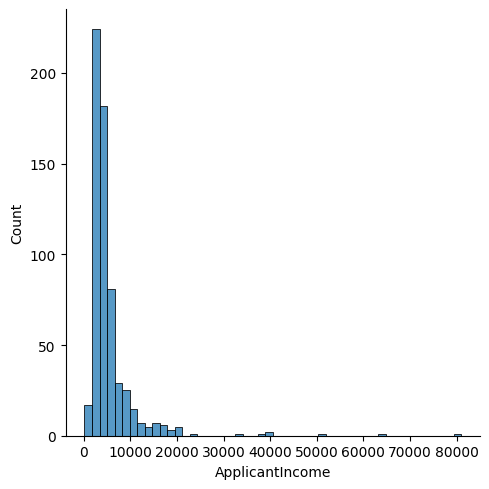

In [11]:
sns.displot(dataset['ApplicantIncome'])
plt.show()

In [12]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,84.037468,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
from sklearn.preprocessing import StandardScaler

In [15]:
ss = StandardScaler()
ss.fit(dataset[['ApplicantIncome']])

,copy,True
,with_mean,True
,with_std,True


In [17]:
dataset["ApplicantIncome_ss"]= pd.DataFrame(ss.transform(dataset[['ApplicantIncome']]), columns=['x'])

In [18]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss
count,614.000000,614.000000,614.000000,600.00000,564.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-4.339634e-18
std,6109.041673,2926.248369,84.037468,65.12041,0.364878,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01
25%,2877.500000,0.000000,100.250000,360.00000,1.000000,-4.138159e-01
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000,-2.606393e-01
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01


C:\Users\Aamir Neyazi\AppData\Local\Temp\ipykernel_9548\3851918221.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['ApplicantIncome'])


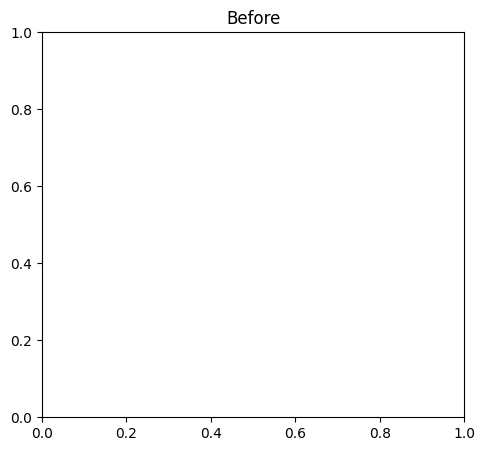

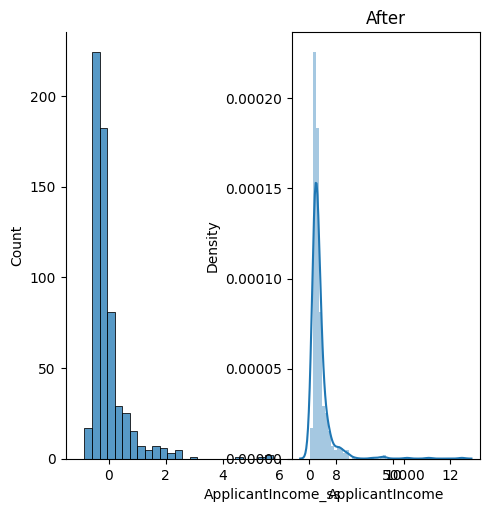

In [20]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Before')
sns.displot(dataset['ApplicantIncome_ss'])

plt.subplot(1, 2, 2)
plt.title('After')
sns.distplot(dataset['ApplicantIncome'])

plt.show()